In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
news= pd.read_csv(r'C:\Users\bnawa\Data\headers\abcnews-date-text.csv',nrows=10000)
news.head(3)

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit

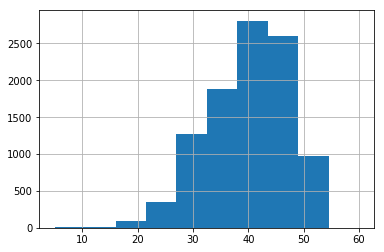

In [4]:
# Number of characters present in each sentence
news['headline_text'].str.len().hist()

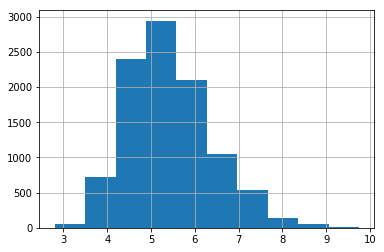

In [5]:
# Average number of words present in each sentence
news['headline_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [6]:
# Remove stopwords
from nltk.corpus import stopwords 
stop = set(stopwords.words('english'))

<BarContainer object of 8 artists>

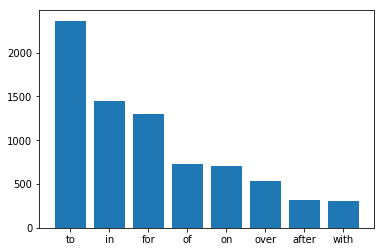

In [7]:
# Create Corpus
corpus=[]
new= news['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
# Plot stopwords      
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:8] 
x,y=zip(*top)
plt.bar(x,y)

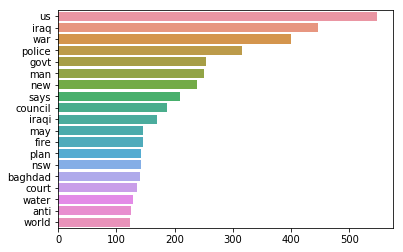

In [8]:
from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

# Plot words occurences    
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [9]:
# N-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

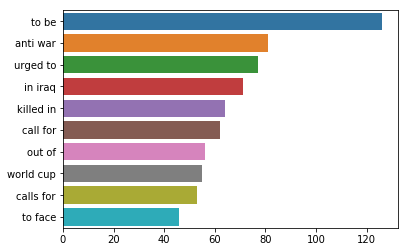

In [10]:
top_n_bigrams=get_top_ngram(news['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

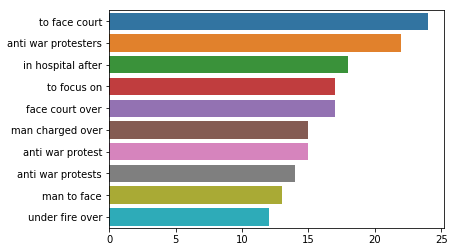

In [11]:
top_tri_grams=get_top_ngram(news['headline_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [12]:
# Topic Modeling
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['headline_text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(news)

In [13]:
corpus[:10]

[['aba', 'decides', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witness', 'must', 'aware', 'defamation'],
 ['call', 'infrastructure', 'protection', 'summit'],
 ['air', 'staff', 'aust', 'strike', 'pay', 'rise'],
 ['air', 'strike', 'affect', 'australian', 'traveller'],
 ['ambitious', 'olsson', 'win', 'triple', 'jump'],
 ['antic', 'delighted', 'record', 'breaking', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'waste', 'four', 'memphis', 'match'],
 ['aust', 'address', 'security', 'council', 'iraq'],
 ['australia', 'locked', 'war', 'timetable', 'opp']]

In [14]:
# Create bag of words
import gensim
import pyLDAvis.gensim

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
bow_corpus[:10]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(15, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)],
 [(16, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]]

In [16]:
# Create LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

D:\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\Anacond

[(0,
  '0.021*"iraq" + 0.013*"baghdad" + 0.010*"iraqi" + 0.009*"troop" + 0.009*"fire" + 0.006*"war" + 0.005*"missing" + 0.005*"crash" + 0.005*"say" + 0.005*"saddam"'),
 (1,
  '0.012*"police" + 0.009*"war" + 0.009*"iraq" + 0.007*"take" + 0.007*"plan" + 0.006*"death" + 0.006*"sars" + 0.005*"iraqi" + 0.005*"report" + 0.005*"claim"'),
 (2,
  '0.012*"win" + 0.011*"war" + 0.010*"man" + 0.008*"new" + 0.008*"court" + 0.006*"back" + 0.006*"anti" + 0.006*"water" + 0.005*"face" + 0.004*"hospital"'),
 (3,
  '0.011*"govt" + 0.007*"say" + 0.006*"council" + 0.005*"world" + 0.005*"may" + 0.005*"nsw" + 0.005*"urged" + 0.005*"korea" + 0.005*"set" + 0.005*"new"')]

In [17]:
# use pyLDAvis to plot LDA
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [18]:
plot_lda_vis(lda_model, bow_corpus, dic)

D:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.150474  0.083937       1        1  25.852091
3      0.011559 -0.165687       2        1  25.508781
2      0.157745  0.091093       3        1  24.649118
1     -0.018830 -0.009343       4        1  23.990007, topic_info=     Category        Freq         Term       Total  loglift  logprob
28    Default  158.000000          win  158.000000  30.0000  30.0000
43    Default  419.000000         iraq  419.000000  29.0000  29.0000
3495  Default  193.000000      baghdad  193.000000  28.0000  28.0000
79    Default  122.000000        troop  122.000000  27.0000  27.0000
249   Default  103.000000        court  103.000000  26.0000  26.0000
171   Default  205.000000        iraqi  205.000000  25.0000  25.0000
8     Default  151.000000         fire  151.000000  24.0000  24.0000
188   Default  215.000000         govt  215.000000  23.0000  23.0000
359   Default   71.000000      missing   71.000000  22.0000  22.0000
317   Default  205.000000          man  205.000000  21.0000  21.0000
588   Default  112.000000         anti  112.000000  20.0000  20.0000
275   Default  244.000000       police  244.000000  19.0000  19.0000
56    Default  101.000000         take  101.000000  18.0000  18.0000
1512  Default   61.000000        korea   61.000000  17.0000  17.0000
437   Default  202.000000          new  202.000000  16.0000  16.0000
1161  Default   58.000000     election   58.000000  15.0000  15.0000
535   Default   54.000000        probe   54.000000  14.0000  14.0000
69    Default  106.000000        water  106.000000  13.0000  13.0000
228   Default   89.000000        crash   89.000000  12.0000  12.0000
93    Default   77.000000        urged   77.000000  11.0000  11.0000
60    Default  158.000000         plan  158.000000  10.0000  10.0000
254   Default  117.000000         back  117.000000   9.0000   9.0000
722   Default   80.000000          set   80.000000   8.0000   8.0000
78    Default  112.000000       report  112.000000   7.0000   7.0000
229   Default   47.000000         head   47.000000   6.0000   6.0000
1075  Default   45.000000       appeal   45.000000   5.0000   5.0000
1160  Default   63.000000    coalition   63.000000   4.0000   4.0000
300   Default   65.000000     minister   65.000000   3.0000   3.0000
280   Default   73.000000        group   73.000000   2.0000   2.0000
95    Default   93.000000       attack   93.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
73     Topic4   29.330259        state   37.951107   1.1699  -6.0335
163    Topic4   70.360336        death  114.313034   0.9422  -5.1585
167    Topic4   34.687458         toll   48.837677   1.0854  -5.8657
572    Topic4   49.102554        first   75.860794   0.9925  -5.5182
628    Topic4   20.002630  palestinian   24.994066   1.2048  -6.4162
78     Topic4   63.074993       report  112.484978   0.8490  -5.2678
60     Topic4   80.140228         plan  158.557617   0.7452  -5.0283
7209   Topic4   68.408943         sars  129.766830   0.7873  -5.1866
90     Topic4   24.647404     bushfire   33.327667   1.1258  -6.2074
690    Topic4   47.338829      protest   83.558174   0.8593  -5.5548
231    Topic4   34.041653      injured   54.254349   0.9614  -5.8845
452    Topic4   34.370132      drought   55.211353   0.9536  -5.8749
273    Topic4   32.855579        green   52.946739   0.9504  -5.9200
49     Topic4  112.419640          war  388.197540   0.1883  -4.6898
1269   Topic4   32.021343       school   53.488518   0.9145  -5.9457
422    Topic4   59.298260        claim  145.401154   0.5306  -5.3295
43     Topic4  111.076874         iraq  419.873566   0.0978  -4.7019
95     Topic4   43.388237       attack   93.494232   0.6598  -5.6419
171    Topic4   67.289986        iraqi  205.680115   0.3102  -5.2031
866    Topic4   29.657207         fear   50.984100   0.8857  -6.0224
634    Topic4   39.899334          hit   88.0

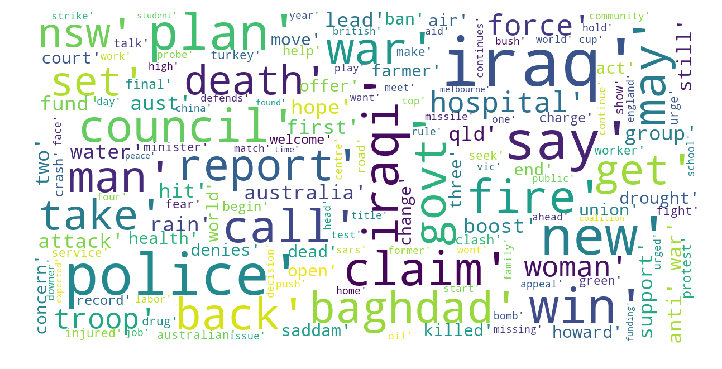

In [19]:
# Create wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=150,
        max_font_size=40,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [20]:
# Sentiment with TextBlob
from textblob import TextBlob
TextBlob('Machine will never be intelligent').sentiment

Sentiment(polarity=0.8, subjectivity=0.9)

In [21]:
TextBlob("Human will never be intelligent").sentiment

Sentiment(polarity=0.4, subjectivity=0.5)

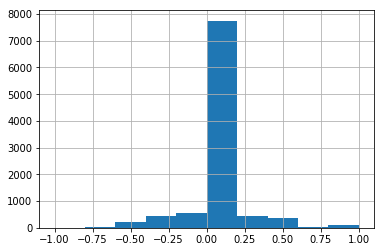

In [22]:
# Plot sentiment polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

news['polarity_score']=news['headline_text'].\
   apply(lambda x : polarity(x))
news['polarity_score'].hist()

<BarContainer object of 3 artists>

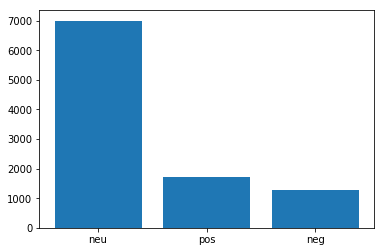

In [23]:
# Get more details
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
news['polarity']=news['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(news.polarity.value_counts().index,
        news.polarity.value_counts())

In [24]:
news[news['polarity']=='pos']['headline_text'].head(10)

1        act fire witnesses must be aware of defamation
5                     ambitious olsson wins triple jump
6            antic delighted with record breaking barca
18           bryant leads lakers to double overtime win
26         commonwealth bank cuts fixed home loan rates
42                dog mauls 18 month old toddler in nsw
45    epa still trying to recover chemical clean up ...
76           iraq to pay for own rebuilding white house
91                   man with knife hijacks light plane
98        more than 40 pc of young men drink alcohol at
Name: headline_text, dtype: object

In [25]:
news[news['polarity']=='neg']['headline_text'].head(10)

7     aussie qualifier stosur wastes four memphis match
23               carews freak goal leaves roma in ruins
28     council chief executive fails to secure position
34                   dargo fire threat expected to rise
40        direct anger at govt not soldiers crean urges
66        hanson is grossly naive over nsw issues costa
70              heavy metal deposits survey nearing end
81       juvenile sex offenders unlikely to reoffend as
82          kelly disgusted at alleged bp ethanol scare
83           kelly not surprised ethanol confidence low
Name: headline_text, dtype: object

In [26]:
news[news['polarity']=='neu']['headline_text'].head(10)

0     aba decides against community broadcasting lic...
2        a g calls for infrastructure protection summit
3              air nz staff in aust strike for pay rise
4         air nz strike to affect australian travellers
8          aust addresses un security council over iraq
9            australia is locked into war timetable opp
10    australia to contribute 10 million in aid to iraq
11    barca take record as robson celebrates birthda...
12                           bathhouse plans move ahead
13        big hopes for launceston cycling championship
Name: headline_text, dtype: object

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bnawa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

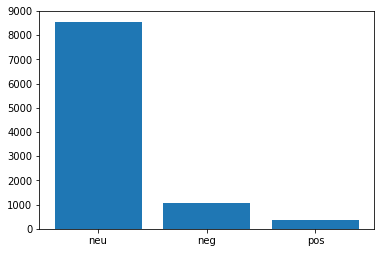

In [27]:
# Vader Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

news['polarity']=news['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=news['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

In [28]:
# Named Entity Recognition
#import spacy
#nlp = spacy.load("en_core_web_sm")

In [29]:
import en_core_web_sm
nlp = en_core_web_sm.load()

D:\Anaconda3\lib\site-packages\thinc\neural\train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
D:\Anaconda3\lib\site-packages\thinc\check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [30]:
# Parts of Speach Tagging

In [31]:
# Sample of displacy
from spacy import displacy
doc = nlp('Machine will never be intelligent')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

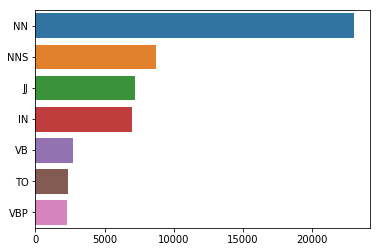

In [32]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=news['headline_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

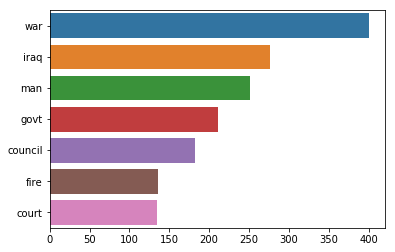

In [33]:
# Go to the noun level
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=news['headline_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

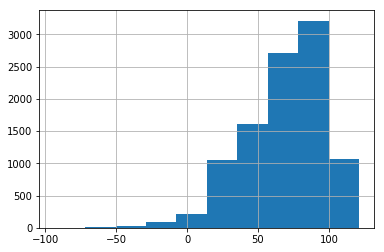

In [34]:
# Text complexity with Textstat 
from textstat import flesch_reading_ease

news['headline_text'].\
   apply(lambda x : flesch_reading_ease(x)).hist()

In [35]:
# Score below 5
x=[i for i in range(len(reading)) if reading[i]<5]
news.iloc[x]['headline_text'].head()

NameError: name 'reading' is not defined